# Results analysis

Analysis of the results provided by case study. Input data is the output of the decision model (that takes input from forecasting models).  

To quickly get the overview of the results, visit [Final results](#final_results), that concludes all the analysis

## Sisukord

* [Data preparation](#prep)
* [Monthly performances analylsis](#performance)
    * [Using Naive forecast](#naive_results)
        * [Performance plots](#naive_performance_plots)
        * [Numerical results](#naive_numerical_performance)
    * [Using ARIMA forecast](#arima_results)
        * [Performance plots](#arima_performance_plots)
        * [Numerical results](#arima_numerical_performance)
* [Analysis of the individual decisions](#decision_analysis)
* [Expected Value of Perfect information](#evpi)
* [Value of Stochastic solution](#vss)
* [Final results](#final_results)

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import ttest_1samp, wilcoxon

import matplotlib.pyplot as plt

<a id='prep'></a>
## Data preparation

1) Take decision model outputs using naive forecast results with different asymmetry multipliers  
2) Take decision model outputs using ARIMA forecast results with different asymmetry multipliers

In [2]:
df_results_naive_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_naive_asymmetry0.1.xlsx')
df_results_naive_01 = df_results_naive_01.groupby(['period', 'strategy']).sum()
df_01 = df_results_naive_01.unstack()


In [3]:
df_01

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2123695.97   2093465.90   
2021-02           1        1                      1   2123221.55   2060538.12   
2021-03           2        2                      2   2621309.56   2538721.47   
2021-04           3        3                      3   1910185.77   1867934.71   
2021-05           4        4                      4   1797217.67   1718089.26   
2021-06           5        5                      5   1184314.10   1139027.47   
2021-07           6        6                      6   2218984.91   2185964.38   
2021-08           7        7                      7   3725220.47   3772639.72   
2021-09           8        8                      8   5502440.21   5437806.41   
2021-10           9        9                      9   7379265.13   7321033.90   
2021-11          10       10                     10   6799567.58   6769228.15   
2021-12          11       11                     11  10066979.31  10089135.26   
2022-01          12       12                     12   9733908.46   9646195.37   
2022-02          13       13                     13   5934772.26   5892624.80   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2324419.38     -108790.87   15493.42   
2021-02              2170695.99       31341.70   47402.46   
2021-03              2612269.59      -53033.55   29166.59   
2021-04              1954269.87      -73846.26  -41366.12   
2021-05              1758551.24     -193789.23 -112332.43   
2021-06              1258910.56     -139647.46  -58869.96   
2021-07              2302113.21       67497.01   76947.19   
2021-08              3961902.93     -496686.67 -161767.46   
2021-09              5640017.48      207436.77  150036.53   
2021-10              7467940.47      -37369.56  142307.93   
2021-11              7239772.72     -286956.82    -885.90   
2021-12             10770234.47     -483104.87    -545.82   
2022-01             10079634.38     -848315.30 -377730.59   
2022-02              6045709.43     -121078.02  102323.34   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               552748.47                          2193107.53   
2021-02               179149.65                          2175418.67   
2021-03               228216.70                          2655455.87   
2021-04               156847.61                          2015695.54   
2021-05                55591.64                          1868423.55   
2021-06               139608.45                          1248509.45   
2021-07               289806.97                          2312166.61   
2021-08               427261.76                          3973589.49   
2021-09               462813.80                          5546917.69   
2021-10               501287.78                          7604991.96   
2021-11              1115357.02                          6917440.56   
2021-12              2112775.42                         10284437.90   
2022-01               357738.61                          9822150.02   
2022-02               287678.21                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              0.968350  0.954566   
2021-02    2175418.67             2175418.67              0.97600

In [4]:
df_results_naive_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_naive_asymmetry0.2.xlsx')
df_results_naive_02 = df_results_naive_02.groupby(['period', 'strategy']).sum()
df_naive_02 = df_results_naive_02.unstack()
df_02=df_naive_02

<a id='performance'></a>
## Monthly performances

Break down the performances with different components, using different forecasts within the model
Compare different asymmetry multiplier results

1) Spot market (Intraday + Day-Ahead) revenue  
2) Imbalance settlement revenue  
3) Total revenue

<a id='naive_results'></a>
### Using Naive forecast in decision model

### Performance plots
<a id='naive_performance_plots'></a>

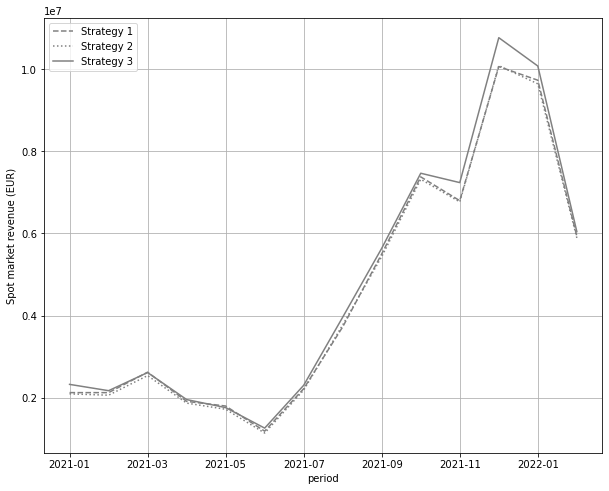

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df_01['Spot revenue']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df_01['Spot revenue']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df_01['Spot revenue']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Spot market (Day-Ahead + Intraday) revenues for different strategies")
ax.set_ylabel('Spot market revenue (EUR)')
ax.grid()
ax.legend()

plt.savefig('spot_revenues.png', dpi=300)

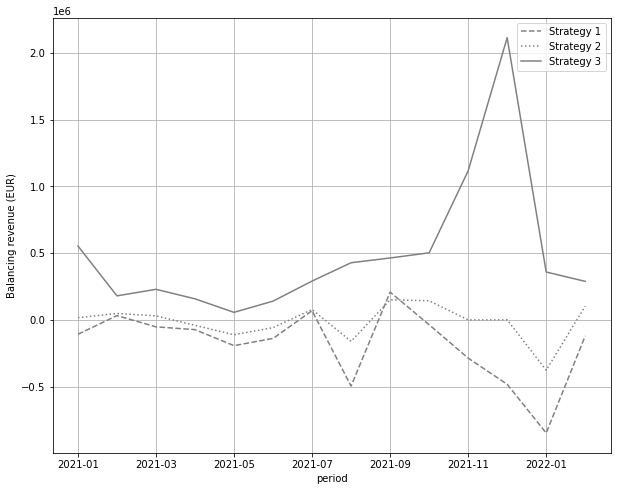

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df_01['Balancing_cost']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df_01['Balancing_cost']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df_01['Balancing_cost']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Imbalance settlement revenues for different strategies")
ax.set_ylabel('Balancing revenue (EUR)')
ax.grid()
ax.legend()

plt.savefig('balancing_revenues.png', dpi=300)

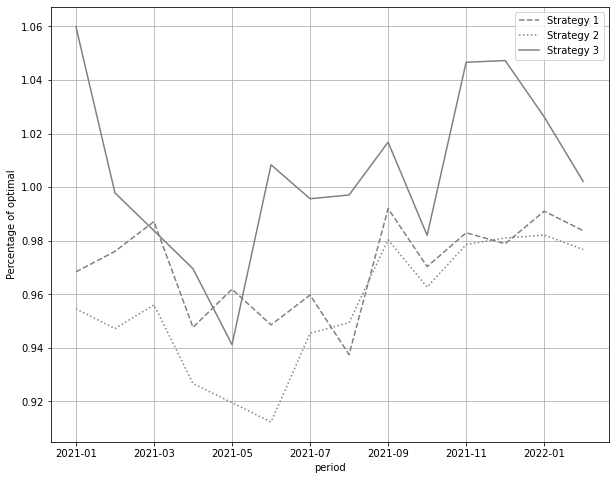

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df_01['Percentage_of_optimal']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df_01['Percentage_of_optimal']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df_01['Percentage_of_optimal']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Percentage of perfect forecast revenues")
ax.set_ylabel('Percentage of optimal')
ax.grid()
ax.legend()

plt.savefig('percentages_optimal.png', dpi=300)

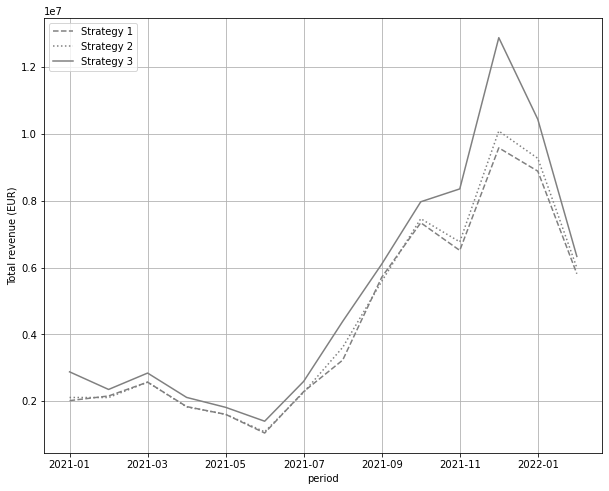

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
(df_01['Balancing_cost']['basic'] + df_01['Spot revenue']['basic']).plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
(df_01['Balancing_cost']['intraday'] + df_01['Spot revenue']['intraday']).plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
(df_01['Balancing_cost']['stochastic_programming'] + df_01['Spot revenue']['stochastic_programming']).plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Total revenues for different strategies")
ax.set_ylabel('Total revenue (EUR)')
ax.grid()
ax.legend()

plt.savefig('total_perfomances_plot.png', dpi=300)

<a id='naive_numerical_performance'></a>
### Numerical comparison of strategies

#### Spot analysis

In [9]:
df_01['Spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.508649e+06,4.466600e+06,4.684746e+06
std,3.046565e+06,3.051713e+06,3.202376e+06
min,1.184314e+06,1.139027e+06,1.258911e+06
25%,2.123340e+06,2.068770e+06,2.203550e+06
50%,3.173265e+06,3.155681e+06,3.287086e+06
75%,6.583369e+06,6.550077e+06,6.941257e+06
max,1.006698e+07,1.008914e+07,1.077023e+07


**Interpretation:** The intraday performs better

In [10]:
spot_diff_basic_intra = df_01['Spot revenue']['basic'] - df_01['Spot revenue']['intraday']

In [11]:
print(f'On average, basic strategy earns {round(spot_diff_basic_intra.mean())} EUR less than intraday on spot markets')

On average, basic strategy earns 42048 EUR less than intraday on spot markets


#### Balancing analysis

In [12]:
df_01['Balancing_cost'].describe()

strategy,basic,intraday,stochastic_programming
count,14.000000,14.00000,1.400000e+01
mean,-181167.366429,-13558.63000,4.904916e+05
std,272361.456073,137718.51381,5.348865e+05
min,-848315.300000,-377730.59000,5.559164e+04
25%,-263664.922500,-54494.00000,1.914164e+05
50%,-114934.445000,7473.80000,3.237728e+05
75%,-41285.557500,69561.00750,4.916693e+05
max,207436.770000,150036.53000,2.112775e+06


**Interpretation:** Intraday strategy has the smallest standard deviation, which is expected, since the strategy is designed close the error between actual and forecast and does not attempt counter cyclical behaviour. Stochastic programming, on the other hand has a large standard deviation, which indicates, the common relationship between risk and reward.   

What is very suprising, is that the stochastic_programming strategy did not lose (on monthly basis) in any month. The min. is ~9300 EUR balance revenue per month. 

In [13]:
balance_diff_basic_intra = df_01['Balancing_cost']['basic'] - df_01['Balancing_cost']['intraday']

In [14]:
print(f'On average, basic strategy earns {round(balance_diff_basic_intra.mean())} EUR less than intraday on balance markets')

On average, basic strategy earns -167609 EUR less than intraday on balance markets


In [15]:
df_naive_01=df_01

### Totals

In [16]:
(df_01['Balancing_cost']+df_01['Spot revenue']).describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.327481e+06,4.453042e+06,5.175237e+06
std,2.899977e+06,3.031516e+06,3.596746e+06
min,1.044667e+06,1.080158e+06,1.398519e+06
25%,2.049820e+06,2.108195e+06,2.410364e+06
50%,2.898405e+06,3.089380e+06,3.633166e+06
75%,6.337882e+06,6.574994e+06,7.560268e+06
max,9.583874e+06,1.008859e+07,1.288301e+07


In [17]:
df_01['Max (perfect forecast) spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.617950e+06,4.617950e+06,4.617950e+06
std,3.080734e+06,3.080734e+06,3.080734e+06
min,1.248509e+06,1.248509e+06,1.248509e+06
25%,2.179841e+06,2.179841e+06,2.179841e+06
50%,3.314523e+06,3.314523e+06,3.314523e+06
75%,6.696330e+06,6.696330e+06,6.696330e+06
max,1.028444e+07,1.028444e+07,1.028444e+07


In [18]:
diff_basic_intra = (df_01['Balancing_cost']['basic'] + df_01['Spot revenue']['basic']) -\
                    (df_01['Balancing_cost']['intraday']+df_01['Spot revenue']['intraday'])

In [19]:
print(f'On average, basic strategy earns {round(diff_basic_intra.mean())} EUR less than on balance markets')

On average, basic strategy earns -125560 EUR less than on balance markets


## Results with Exponential smoothing

In [20]:
df_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_exponential_smoothing_asymmetry0.1.xlsx')
df_01 = df_01.groupby(['period', 'strategy']).sum()
df_01 = df_01.unstack()

In [21]:
df_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_exponential_smoothing_asymmetry0.2.xlsx')
df_02 = df_02.groupby(['period', 'strategy']).sum()
df_02 = df_02.unstack()

In [22]:
df_es_01 = df_01
df_es_02 = df_02

<a id='arima_performance'></a>
## Results with ARIMA

In [23]:
df_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_arima_asymmetry0.1.xlsx')
df_01 = df_01.groupby(['period', 'strategy']).sum()
df_01 = df_01.unstack()

In [24]:
df_01

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2247980.26   2093465.90   
2021-02           1        1                      1   2139282.31   2060538.12   
2021-03           2        2                      2   2703509.70   2538721.47   
2021-04           3        3                      3   1942665.91   1867934.71   
2021-05           4        4                      4   1878674.47   1718089.26   
2021-06           5        5                      5   1265091.60   1139027.47   
2021-07           6        6                      6   2228435.09   2185964.38   
2021-08           7        7                      7   4060139.68   3772639.72   
2021-09           8        8                      8   5445039.97   5437806.41   
2021-10           9        9                      9   7558942.62   7321033.90   
2021-11          10       10                     10   7085638.50   6769228.15   
2021-12          11       11                     11  10549538.36  10089135.26   
2022-01          12       12                     12  10204493.17   9646195.37   
2022-02          13       13                     13   6158173.62   5892624.80   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2269954.76       15493.42   15493.42   
2021-02              2138648.64       47402.46   47402.46   
2021-03              2589652.39       29166.59   29166.59   
2021-04              1937637.44      -41366.12  -41366.12   
2021-05              1756312.62     -112332.43 -112332.43   
2021-06              1208664.73      -58869.96  -58869.96   
2021-07              2257227.15       76947.19   76947.19   
2021-08              3915587.08     -161767.46 -161767.46   
2021-09              5577338.10      150036.53  150036.53   
2021-10              7438283.49      142307.93  142307.93   
2021-11              7123088.99        -885.90    -885.90   
2021-12             10602905.41        -545.82    -545.82   
2022-01              9937893.98     -377730.59 -377730.59   
2022-02              6003394.50      102323.34  102323.34   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               407850.41                          2193107.53   
2021-02               130158.91                          2175418.67   
2021-03               179482.47                          2655455.87   
2021-04               126362.88                          2015695.54   
2021-05                32312.57                          1868423.55   
2021-06               113266.58                          1248509.45   
2021-07               254610.02                          2312166.61   
2021-08               263924.63                          3973589.49   
2021-09               394038.50                          5546917.69   
2021-10               438072.25                          7604991.96   
2021-11               818797.67                          6917440.56   
2021-12              1519732.66                         10284437.90   
2022-01               176059.96                          9822150.02   
2022-02               266468.38                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              1.025021  0.954566   
2021-02    2175418.67             2175418.67              0.98338

<a id='arima_performance_plots'></a>
### Performance plots

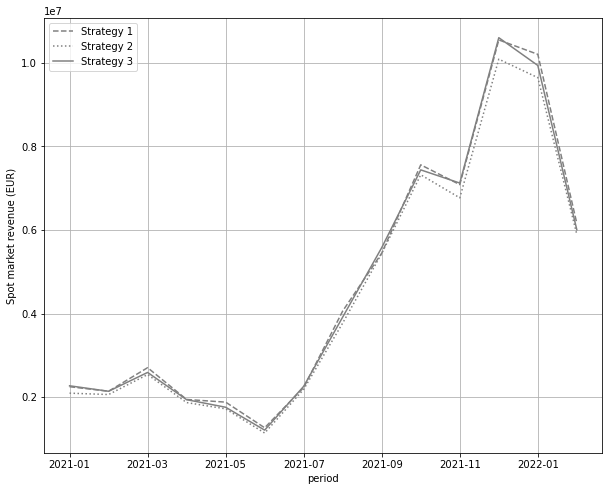

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df_01['Spot revenue']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df_01['Spot revenue']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df_01['Spot revenue']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Spot market (Day-Ahead + Intraday) revenues for different strategies")
ax.set_ylabel('Spot market revenue (EUR)')
ax.grid()
ax.legend()


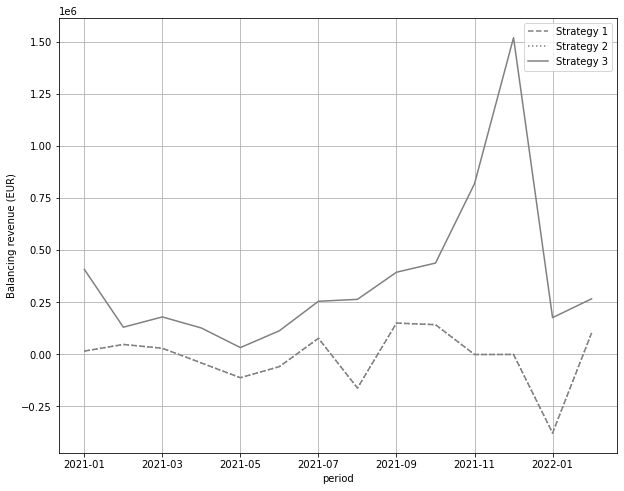

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df_01['Balancing_cost']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df_01['Balancing_cost']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df_01['Balancing_cost']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Imbalance settlement revenues for different strategies")
ax.set_ylabel('Balancing revenue (EUR)')
ax.grid()
ax.legend()

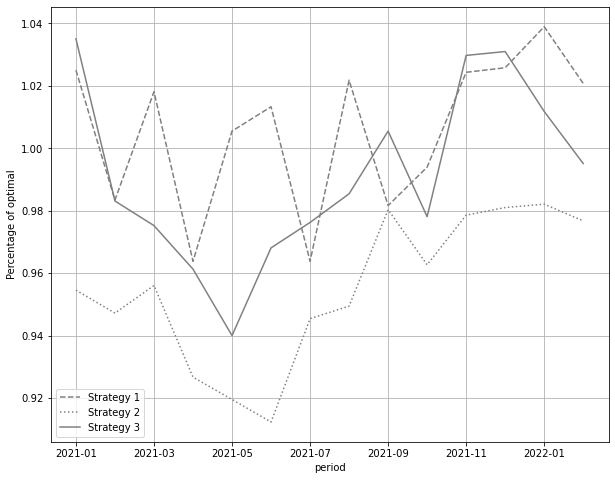

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
df_01['Percentage_of_optimal']['basic'].plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
df_01['Percentage_of_optimal']['intraday'].plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
df_01['Percentage_of_optimal']['stochastic_programming'].plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Percentage of perfect forecast revenues")
ax.set_ylabel('Percentage of optimal')
ax.grid()
ax.legend()

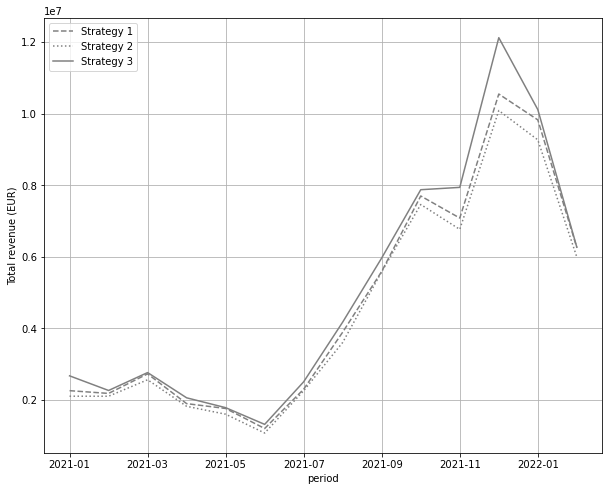

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
(df_01['Balancing_cost']['basic'] + df_01['Spot revenue']['basic']).plot(ax=ax, c='grey', linestyle='--', label='Strategy 1')
(df_01['Balancing_cost']['intraday'] + df_01['Spot revenue']['intraday']).plot(ax=ax, c='grey',linestyle='dotted', label='Strategy 2')
(df_01['Balancing_cost']['stochastic_programming'] + df_01['Spot revenue']['stochastic_programming']).plot(ax=ax, c='grey', label='Strategy 3')


# ax.set_title("Total revenues for different strategies")
ax.set_ylabel('Total revenue (EUR)')
ax.grid()
ax.legend()

<a id='arima_numerical_performance'></a>
#### Numerical results

In [29]:
df_01['Spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.676258e+06,4.466600e+06,4.625471e+06
std,3.180347e+06,3.051713e+06,3.162608e+06
min,1.265092e+06,1.139027e+06,1.208665e+06
25%,2.161571e+06,2.068770e+06,2.168293e+06
50%,3.381825e+06,3.155681e+06,3.252620e+06
75%,6.853772e+06,6.550077e+06,6.843165e+06
max,1.054954e+07,1.008914e+07,1.060291e+07


In [30]:
df_01['Balancing_cost'].describe()

strategy,basic,intraday,stochastic_programming
count,14.00000,14.00000,1.400000e+01
mean,-13558.63000,-13558.63000,3.657956e+05
std,137718.51381,137718.51381,3.858781e+05
min,-377730.59000,-377730.59000,3.231257e+04
25%,-54494.00000,-54494.00000,1.416342e+05
50%,7473.80000,7473.80000,2.592673e+05
75%,69561.00750,69561.00750,4.043974e+05
max,150036.53000,150036.53000,1.519733e+06


In [31]:
spot_diff_basic_intra = df_01['Spot revenue']['basic'] - df_01['Spot revenue']['intraday']

In [32]:
(df_01['Balancing_cost']+df_01['Spot revenue']).describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.662699e+06,4.453042e+06,4.991266e+06
std,3.156823e+06,3.031516e+06,3.436476e+06
min,1.206222e+06,1.080158e+06,1.321931e+06
25%,2.205882e+06,2.108195e+06,2.329565e+06
50%,3.315524e+06,3.089380e+06,3.474323e+06
75%,6.878689e+06,6.574994e+06,7.474733e+06
max,1.054899e+07,1.008859e+07,1.212264e+07


In [33]:
df_arima_01=df_01

## Results LSTM

In [34]:
df_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_LSTM_asymmetry0.1.xlsx')
df_01 = df_01.groupby(['period', 'strategy']).sum()
df_01 = df_01.unstack()

In [35]:
df_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_LSTM_asymmetry0.2_MODIFIED.xlsx')
df_02 = df_02.groupby(['period', 'strategy']).sum()
df_02 = df_02.unstack()

In [36]:
df_lstm_01 = df_01
df_lstm_02 = df_02

In [37]:
df_lstm_01

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2247980.26   2093465.90   
2021-02           1        1                      1   2139282.31   2060538.12   
2021-03           2        2                      2   2703509.70   2538721.47   
2021-04           3        3                      3   1942665.91   1867934.71   
2021-05           4        4                      4   1878674.47   1718089.26   
2021-06           5        5                      5   1265091.60   1139027.47   
2021-07           6        6                      6   2228435.09   2185964.38   
2021-08           7        7                      7   4060139.68   3772639.72   
2021-09           8        8                      8   5445039.97   5437806.41   
2021-10           9        9                      9   7558942.62   7321033.90   
2021-11          10       10                     10   7085638.50   6769228.15   
2021-12          11       11                     11  10549538.36  10089135.26   
2022-01          12       12                     12  10204493.17   9646195.37   
2022-02          13       13                     13   6158173.62   5892624.80   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2367279.81       15493.42   15493.42   
2021-02              2207083.91       47402.46   47402.46   
2021-03              2676893.75       29166.59   29166.59   
2021-04              1998907.08      -41366.12  -41366.12   
2021-05              1796961.12     -112332.43 -112332.43   
2021-06              1264998.25      -58869.96  -58869.96   
2021-07              2319212.92       76947.19   76947.19   
2021-08              3989197.83     -161767.46 -161767.46   
2021-09              5677834.51      150036.53  150036.53   
2021-10              7569358.91      142307.93  142307.93   
2021-11              7424205.08        -885.90    -885.90   
2021-12             10966720.42        -545.82    -545.82   
2022-01             10278985.70     -377730.59 -377730.59   
2022-02              6265531.39      102323.34  102323.34   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               536531.38                          2193107.53   
2021-02               183112.38                          2175418.67   
2021-03               231239.17                          2655455.87   
2021-04               134568.79                          2015695.54   
2021-05                41108.65                          1868423.55   
2021-06               104455.28                          1248509.45   
2021-07               253286.71                          2312166.61   
2021-08               319053.77                          3973589.49   
2021-09               389911.43                          5546917.69   
2021-10               476736.14                          7604991.96   
2021-11              1114022.85                          6917440.56   
2021-12              1997661.83                         10284437.90   
2022-01               425953.23                          9822150.02   
2022-02               426565.51                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              1.025021  0.954566   
2021-02    2175418.67             2175418.67              0.98338

In [38]:
df_lstm_02

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2123695.97   2123695.97   
2021-02           1        1                      1   2123221.55   2123221.55   
2021-03           2        2                      2   2621309.56   2621309.56   
2021-04           3        3                      3   1910185.77   1910185.77   
2021-05           4        4                      4   1797217.67   1797217.67   
2021-06           5        5                      5   1184314.10   1184314.10   
2021-07           6        6                      6   2218984.91   2218984.91   
2021-08           7        7                      7   3725220.47   3725220.47   
2021-09           8        8                      8   5502440.21   5502440.21   
2021-10           9        9                      9   7379265.13   7379265.13   
2021-11          10       10                     10   6799567.58   6799567.58   
2021-12          11       11                     11  10066979.31  10066979.31   
2022-01          12       12                     12   9733908.46   9733908.46   
2022-02          13       13                     13   5934772.26   5934772.26   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2399857.09     -108790.87 -108790.87   
2021-02              2270937.19       31341.70   31341.70   
2021-03              2767290.44      -53033.55  -53033.55   
2021-04              2029809.48      -73846.26  -73846.26   
2021-05              1867402.60     -193789.23 -193789.23   
2021-06              1313628.22     -139647.46 -139647.46   
2021-07              2374850.30       67497.01   67497.01   
2021-08              3972714.47     -496686.67 -496686.67   
2021-09              5797741.92      207436.77  207436.77   
2021-10              7673592.02      -37369.56  -37369.56   
2021-11              7565903.43     -286956.82 -286956.82   
2021-12             11070554.36     -483104.87 -483104.87   
2022-01             10619060.29     -848315.30 -848315.30   
2022-02              6459620.35     -121078.02 -121078.02   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               479236.82                          2193107.53   
2021-02               182727.28                          2175418.67   
2021-03               201218.97                          2655455.87   
2021-04               140715.77                          2015695.54   
2021-05               -32389.00                          1868423.55   
2021-06                23386.75                          1248509.45   
2021-07               299281.83                          2312166.61   
2021-08                82985.91                          3973589.49   
2021-09               429220.35                          5546917.69   
2021-10               281486.76                          7604991.96   
2021-11              1052825.53                          6917440.56   
2021-12              1808030.91                         10284437.90   
2022-01               153418.71                          9822150.02   
2022-02               312367.35                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              0.968350  0.968350   
2021-02    2175418.67             2175418.67              0.97600

## Results with higher asymmetry multiplier

In [39]:
df_results_arima_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/total_results/total_results_arima_asymmetry0.2.xlsx')
df_results_arima_02 = df_results_arima_02.groupby(['period', 'strategy']).sum()
df_02 = df_results_arima_02.unstack()

In [40]:
df_02['Spot revenue'].describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.676258e+06,4.466600e+06,4.688668e+06
std,3.180347e+06,3.051713e+06,3.198141e+06
min,1.265092e+06,1.139027e+06,1.254723e+06
25%,2.161571e+06,2.068770e+06,2.205422e+06
50%,3.381825e+06,3.155681e+06,3.296008e+06
75%,6.853772e+06,6.550077e+06,6.938637e+06
max,1.054954e+07,1.008914e+07,1.073753e+07


In [41]:
df_02['Balancing_cost'].describe()

strategy,basic,intraday,stochastic_programming
count,14.00000,14.00000,1.400000e+01
mean,-13558.63000,-13558.63000,4.411647e+05
std,137718.51381,137718.51381,4.862097e+05
min,-377730.59000,-377730.59000,5.129402e+04
25%,-54494.00000,-54494.00000,1.637024e+05
50%,7473.80000,7473.80000,2.830196e+05
75%,69561.00750,69561.00750,4.570855e+05
max,150036.53000,150036.53000,1.901339e+06


In [42]:
(df_02['Balancing_cost']+df_02['Spot revenue']).describe()

strategy,basic,intraday,stochastic_programming
count,1.400000e+01,1.400000e+01,1.400000e+01
mean,4.662699e+06,4.453042e+06,5.129833e+06
std,3.156823e+06,3.031516e+06,3.552345e+06
min,1.206222e+06,1.080158e+06,1.374409e+06
25%,2.205882e+06,2.108195e+06,2.372248e+06
50%,3.315524e+06,3.089380e+06,3.590877e+06
75%,6.878689e+06,6.574994e+06,7.556531e+06
max,1.054899e+07,1.008859e+07,1.263887e+07


In [43]:
df_arima_02 = df_02

<a id='decision_analysis'></a>
## Analysis of the individual decisions

In [44]:
df_decisions_naive_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.1_naive.xlsx')
df_decisions_naive_01.drop('Unnamed: 0', inplace=True, axis=1)

df_decisions_naive_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.2_naive.xlsx')
df_decisions_naive_02.drop('Unnamed: 0', inplace=True, axis=1)

In [45]:
df_decisions_arima_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.1_arima.xlsx')
df_decisions_arima_01.drop('Unnamed: 0', inplace=True, axis=1)

df_decisions_arima_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.2_arima.xlsx')
df_decisions_arima_02.drop('Unnamed: 0', inplace=True, axis=1)

In [46]:
df_decisions_arima_01.id_quantities.abs().sum()

123264.81490140289

In [47]:
df_decisions_es_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.1_exponential_smoothing.xlsx')
df_decisions_es_01.drop('Unnamed: 0', inplace=True, axis=1)

df_decisions_es_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.2_exponential_smoothing.xlsx')
df_decisions_es_02.drop('Unnamed: 0', inplace=True, axis=1)

In [48]:
df_decisions_lstm_01 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.1_LSTM.xlsx')
df_decisions_lstm_01.drop('Unnamed: 0', inplace=True, axis=1)

df_decisions_lstm_02 = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/stochastic_strategy_decisions_asymmetry=0.2_LSTM.xlsx')
df_decisions_lstm_02.drop('Unnamed: 0', inplace=True, axis=1)

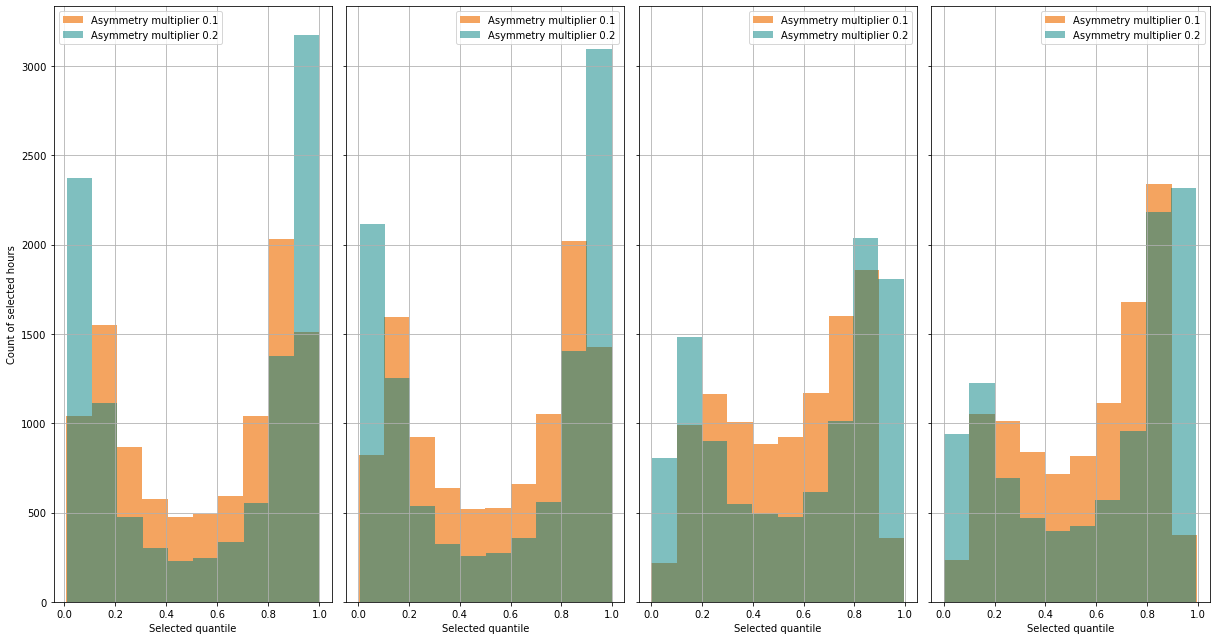

In [49]:
figure, axis = plt.subplots(1, 4, figsize=(17, 9), sharey=True)

axis[0].hist(df_decisions_naive_01.optimal_quantile,label='Asymmetry multiplier 0.1', color='sandybrown')
axis[0].hist(df_decisions_naive_02.optimal_quantile,label='Asymmetry multiplier 0.2', color='teal', alpha=0.5)

axis[1].hist(df_decisions_es_01.optimal_quantile,label='Asymmetry multiplier 0.1', color='sandybrown')
axis[1].hist(df_decisions_es_02.optimal_quantile,label='Asymmetry multiplier 0.2', color='teal', alpha=0.5)

axis[2].hist(df_decisions_arima_01.optimal_quantile,label='Asymmetry multiplier 0.1', color='sandybrown')
axis[2].hist(df_decisions_arima_02.optimal_quantile,label='Asymmetry multiplier 0.2', color='teal', alpha=0.5)

axis[3].hist(df_decisions_lstm_01.optimal_quantile,label='Asymmetry multiplier 0.1', color='sandybrown')
axis[3].hist(df_decisions_lstm_02.optimal_quantile,label='Asymmetry multiplier 0.2', color='teal', alpha=0.5)


# axis[0].title.set_text("Decision model results with Naive forecast")
# axis[1].title.set_text("Decision model results with Exponential smoothing forecast")
# axis[2].title.set_text("Decision model results with ARIMA forecast")
# axis[3].title.set_text("Decision model results with LSTM forecast")


axis[0].set_xlabel('Selected quantile')
axis[1].set_xlabel('Selected quantile')
axis[2].set_xlabel('Selected quantile')
axis[3].set_xlabel('Selected quantile')

axis[0].grid(visible=True)
axis[1].grid(visible=True)
axis[2].grid(visible=True)
axis[3].grid(visible=True)


axis[0].set_ylabel('Count of selected hours')

axis[0].legend(loc='best')
axis[1].legend(loc='best')
axis[2].legend(loc='best')
axis[3].legend(loc='best')

plt.tight_layout()
plt.savefig('decisions_all_models.png', dpi=300)

plt.show()

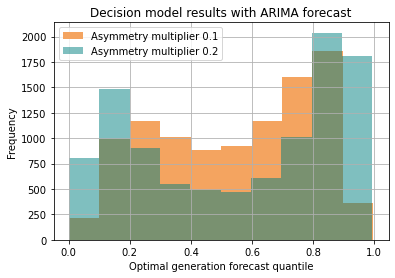

<Figure size 432x288 with 0 Axes>

In [50]:
df_decisions_arima_01.optimal_quantile.hist(label='Asymmetry multiplier 0.1',color='sandybrown')
df_decisions_arima_02.optimal_quantile.hist(label='Asymmetry multiplier 0.2',color='teal', alpha=0.5)
plt.xlabel('Optimal generation forecast quantile')
plt.ylabel('Frequency')
plt.title('Decision model results with ARIMA forecast')
plt.legend()

plt.show()

plt.savefig('decisions_arima_model.png', dpi=300)

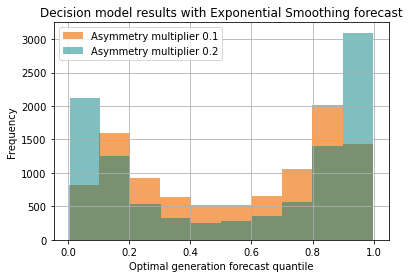

<Figure size 432x288 with 0 Axes>

In [51]:
df_decisions_es_01.optimal_quantile.hist(label='Asymmetry multiplier 0.1',color='sandybrown')
df_decisions_es_02.optimal_quantile.hist(label='Asymmetry multiplier 0.2',color='teal', alpha=0.5)
plt.xlabel('Optimal generation forecast quantile')
plt.ylabel('Frequency')
plt.title('Decision model results with Exponential Smoothing forecast')
plt.legend()

plt.show()

plt.savefig('decisions_exponential_smoothing_model.png', dpi=300)

**Important interpretations!**  

It can be seen, that using higher multiplier, increases the extremely large/small positions with any forecast method. We go for more conservative behaviour of lower multiplier, since the primary goal is to reduce financial loss, not strongly speculate with our position  

Another takeaway from the decisions is that the Naive forecast puts in the extremely high values, while ARIMA almost never predicts peak values, but rather conservative estimates. This causes the decisions to deviate more from 0.5 in Naive forecast model

array([[<AxesSubplot:title={'center':'optimal_quantile'}>,
        <AxesSubplot:title={'center':'optimal_position'}>],
       [<AxesSubplot:title={'center':'sold_da'}>,
        <AxesSubplot:title={'center':'id_quantities'}>]], dtype=object)

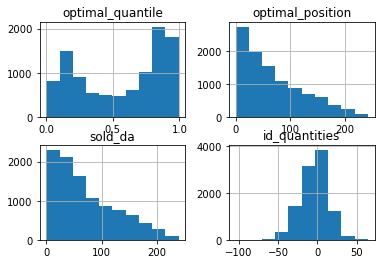

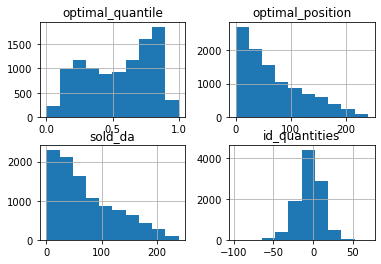

In [52]:
df_decisions_arima_02.hist()
df_decisions_arima_01.hist()

## Sold balancing quantities

The amount sold in balancing market cannot be very big, as the market is small, and bigger quantities have effect on price, rendering the model results wrong

In [53]:
df_naive01_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.1_naive.xlsx')
df_naive01_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_naive01_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,3.863323,674.811524
std,16.693963,2855.655751
min,-55.913686,-14292.660403
25%,-8.143862,-284.067885
50%,2.396078,74.508330
75%,14.562013,1009.406630
max,87.813490,85770.689173


In [54]:
df_naive02_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.2_naive.xlsx')
df_naive02_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_naive02_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,3.979986,805.224646
std,19.331434,3287.402180
min,-57.824309,-16149.384116
25%,-10.767754,-379.183174
50%,1.909293,74.521443
75%,17.230306,1237.965973
max,81.493986,94387.190420


In [55]:
df_es01_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.1_exponential_smoothing.xlsx')
df_es01_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_es01_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,3.847963,618.701864
std,16.735567,2822.776802
min,-56.998487,-13919.052557
25%,-8.225061,-308.999183
50%,2.384230,66.861860
75%,14.677458,938.169834
max,70.527122,82863.574709


In [56]:
df_es02_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.2_exponential_smoothing.xlsx')
df_es02_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_es02_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,3.940384,732.199153
std,19.381021,3255.294394
min,-60.581435,-15836.689375
25%,-10.937209,-409.213206
50%,1.842751,65.587678
75%,17.419041,1161.924173
max,76.708438,94237.177054


In [57]:
df_arima01_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.1_arima.xlsx')
df_arima01_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_arima01_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,3.499689,503.256474
std,14.703594,2451.369097
min,-65.179482,-14176.036621
25%,-6.443277,-250.452115
50%,2.386508,57.125031
75%,12.354321,796.135125
max,69.871211,71352.932426


In [58]:
df_arima02_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.2_arima.xlsx')
df_arima02_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_arima02_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,3.159214,606.948303
std,16.548793,2811.826306
min,-63.141040,-14748.419051
25%,-8.788461,-320.690145
50%,1.673182,53.220366
75%,13.693593,947.094692
max,70.295773,82838.005138


In [59]:
df_lstm01_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.1_LSTM.xlsx')
df_lstm01_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_lstm01_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,2.807382,651.946454
std,14.568561,2610.305355
min,-57.031953,-13742.182130
25%,-7.176731,-236.281538
50%,1.562527,56.112792
75%,11.762657,864.786321
max,69.230654,83584.174913


In [60]:
df_lstm02_imbalance = pd.read_excel('../../data/imbalance_strategy/full_case_study/results/decisions/balancing_market_quantities_asymmetry=0.2_LSTM.xlsx')
df_lstm02_imbalance.drop('Unnamed: 0', inplace=True, axis=1)
df_lstm02_imbalance.describe()

,imbalance_qty,imbalance_revenue
count,10176.000000,10176.000000
mean,1.963747,796.773997
std,16.401507,2986.025733
min,-56.276449,-14775.932181
25%,-9.837881,-316.525392
50%,0.359753,42.097930
75%,12.112849,1053.618811
max,75.557718,94387.190420


<a id='evpi'></a>
## Calculation of EVPI

In order to know, how much economic value does the imbalance forecast have, we evaluate, what is the difference in  100% accurate forecasts and naive-forecast 2h ahead about the imbalance price, so the "Perfect forecast" is used in conjunction with optimization logic.

**We assume, that max asymmetry multiplier, that we can use is 0.2. This assumption is needed, to satisfy the price taker assumption (We don't influence the market)**

Define EVPI as 
$$EVPI = WS - RC$$

where WS - wait and see, RC - Recourse

We are interested also in percentage terms 
$$EVPI(\%) = \frac{WS-RC}{RC}$$ 

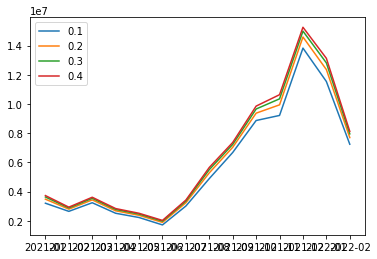

In [61]:
totals = []

asymmetry_multipliers = [0.1, 0.2, 0.3, 0.4]

for mul in asymmetry_multipliers:
    df_results_perfect = pd.read_excel(f'../../src/optimization_backtesting/total_results_perfect_information_asymmetry{str(mul)}.xlsx')
    df_results_perfect = df_results_perfect.groupby(['period', 'strategy']).sum()
    df = df_results_perfect.unstack()

    total=df['Balancing_cost']+df['Spot revenue']
    plt.plot(total['stochastic_programming'], label=mul)
    plt.legend()
    totals.append(total['stochastic_programming'])

In [62]:
df_results_perfect = pd.read_excel(f'../../data/imbalance_strategy/full_case_study/results/total_results/total_results_perfect_information_asymmetry0.2_EVPI.xlsx')
df_results_perfect = df_results_perfect.groupby(['period', 'strategy']).sum()
df = df_results_perfect.unstack()

total_perfect=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with perfect imbalance forecast={total_perfect["stochastic_programming"].mean()}')

The mean revenue in month with perfect imbalance forecast=6157315.154285714


In [63]:
df_results_naive = pd.read_excel(f'../../data/imbalance_strategy/full_case_study/results/total_results/total_results_naive_asymmetry0.2.xlsx')
df_results_naive = df_results_naive.groupby(['period', 'strategy']).sum()
df = df_results_naive.unstack()

total_naive=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with naive imbalance forecast={total_naive["stochastic_programming"].mean()}')

The mean revenue in month with naive imbalance forecast=5320196.736428572


In [64]:
df_results_arima = pd.read_excel(f'../../data/imbalance_strategy/full_case_study/results/total_results/total_results_arima_asymmetry0.2.xlsx')
df_results_arima = df_results_arima.groupby(['period', 'strategy']).sum()
df = df_results_arima.unstack()

total_arima=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with arima imbalance forecast={total_arima["stochastic_programming"].mean()}')

The mean revenue in month with arima imbalance forecast=5129833.055714286


In [65]:
evpi = total_perfect-total_naive

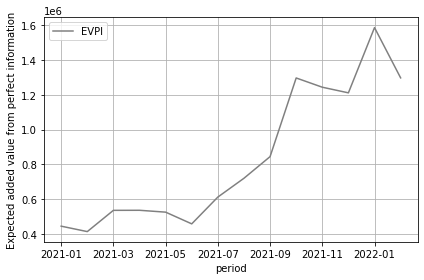

In [66]:
evpi['stochastic_programming'].plot(c='grey', label='EVPI')

plt.grid()
plt.ylabel('Expected added value from perfect information')
plt.legend()
plt.tight_layout()
plt.savefig('EVPI_monthly.png', pad_inches=0.2, dpi=300)

In [67]:
evpi.mean()

strategy
basic                    -335217.472857
intraday                   61097.083571
stochastic_programming    837118.417857
dtype: float64

In [68]:
print(f"The percentage of my model by adding perfect forecast is  {(evpi['stochastic_programming'].mean() / total_naive['stochastic_programming'].mean())*100}%")

The percentage of my model by adding perfect forecast is  15.734726727776934%


<a id='vss'></a>
## VSS - Value of stochastic solution

It would be easier in terms of modelling, to replace random variable with expected value. In our case, the random variable is $\alpha$ and if we replace it with expected value, we get deterministic model.

Now, the expected value solution can be compared to the stochastic modelling solution

To calculate the VSS
$$VSS = SP - DP$$

DP - Deterministic program  
SP - Stochastic program  

In [69]:
df_deterministic = pd.read_excel(f'../../data/imbalance_strategy/full_case_study/results/total_results/total_results_deterministic_VSS.xlsx')
df_deterministic = df_deterministic.groupby(['period', 'strategy']).sum()
df = df_deterministic.unstack()

total_deterministic=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with expected value program={total_deterministic["stochastic_programming"].mean()}')

The mean revenue in month with expected value program=4747755.419285715


In [70]:
df_results_stochastic = pd.read_excel(f'../../data/imbalance_strategy/full_case_study/results/total_results/total_results_naive_asymmetry0.2.xlsx')
df_results_stochastic = df_results_stochastic.groupby(['period', 'strategy']).sum()
df = df_results_stochastic.unstack()

total_stochastic=df['Balancing_cost']+df['Spot revenue']
print(f'The mean revenue in month with naive imbalance forecast={total_stochastic["stochastic_programming"].mean()}')

The mean revenue in month with naive imbalance forecast=5320196.736428572


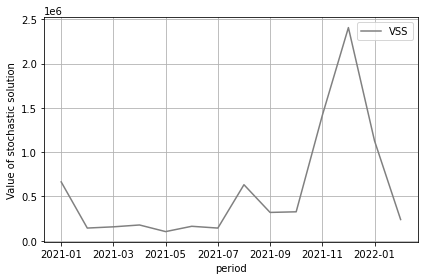

In [71]:
vss = total_stochastic - total_deterministic
vss['stochastic_programming'].plot(c='grey', label='VSS')

plt.grid()
plt.ylabel('Value of stochastic solution')
plt.legend()
plt.tight_layout()
plt.savefig('VSS_monthly.png', pad_inches=0.2, dpi=300)

Since the november-december period is strongly different, we use median as value for central tendency

In [72]:
vss.median()

strategy
basic                     206484.430
intraday                  -64386.465
stochastic_programming    279306.960
dtype: float64

In [73]:
print(f"The stochastic solution increases value from expected value solution by {(vss['stochastic_programming'].median() / total_deterministic['stochastic_programming'].mean())*100}%")

The stochastic solution increases value from expected value solution by 5.882926463849328%


In [74]:
print(f"The stochastic solution increases value from expected value solution by {(vss['stochastic_programming'].mean() / total_deterministic['stochastic_programming'].mean())*100}%")

The stochastic solution increases value from expected value solution by 12.057093649297105%


## Risk assessments

In [75]:
df_strategy_comparison = pd.read_excel(f'../../data/imbalance_strategy/full_case_study/results/total_results/strategy_imbalance_comparison.xlsx')


In [76]:
costs=df_strategy_comparison[['Revenue 1', 'Revenue 2', 'Revenue 3']]

In [77]:
costs.describe()

,Revenue 1,Revenue 2,Revenue 3
count,10176.000000,10176.000000,10176.000000
mean,-249.247556,-18.454106,674.811524
std,2650.411465,1853.791730,2855.655751
min,-26985.651888,-20859.279185,-14292.660403
25%,-686.915466,-405.895551,-284.067885
50%,-69.327807,-18.208782,74.508330
75%,321.512229,330.926126,1009.406630
max,67250.326420,45667.355216,85770.689173


In [78]:
costs.quantile(0.05)

Revenue 1   -3707.570849
Revenue 2   -2212.809992
Revenue 3   -1995.585136
Name: 0.05, dtype: float64

In [79]:
costs.quantile(0.95
              )

Revenue 1    2680.546500
Revenue 2    2280.556920
Revenue 3    5190.083861
Name: 0.95, dtype: float64

In [80]:
costs.quantile(0.75)

Revenue 1     321.512229
Revenue 2     330.926126
Revenue 3    1009.406630
Name: 0.75, dtype: float64

In [81]:
costs.quantile(0.25)

Revenue 1   -686.915466
Revenue 2   -405.895551
Revenue 3   -284.067885
Name: 0.25, dtype: float64

Text(0.5, 0, 'Imbalance settlement profit/loss')

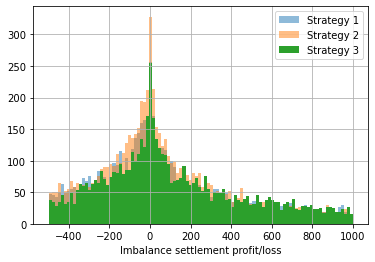

In [82]:
costs['Revenue 1'].hist(label='Strategy 1', bins=100, range=[-500, 1000], alpha=0.5)
costs['Revenue 2'].hist(label='Strategy 2', bins=100, range=[-500, 1000], alpha=0.5)
costs['Revenue 3'].hist(label='Strategy 3',bins=100, range=[-500, 1000])

plt.legend()
plt.xlabel('Imbalance settlement profit/loss')

In [178]:
df_01['']

Unnamed: 0                                 Spot revenue               \
strategy      basic intraday stochastic_programming        basic     intraday   
period                                                                          
2021-01           0        0                      0   2247980.26   2093465.90   
2021-02           1        1                      1   2139282.31   2060538.12   
2021-03           2        2                      2   2703509.70   2538721.47   
2021-04           3        3                      3   1942665.91   1867934.71   
2021-05           4        4                      4   1878674.47   1718089.26   
2021-06           5        5                      5   1265091.60   1139027.47   
2021-07           6        6                      6   2228435.09   2185964.38   
2021-08           7        7                      7   4060139.68   3772639.72   
2021-09           8        8                      8   5445039.97   5437806.41   
2021-10           9        9                      9   7558942.62   7321033.90   
2021-11          10       10                     10   7085638.50   6769228.15   
2021-12          11       11                     11  10549538.36  10089135.26   
2022-01          12       12                     12  10204493.17   9646195.37   
2022-02          13       13                     13   6158173.62   5892624.80   

                                Balancing_cost             \
strategy stochastic_programming          basic   intraday   
period                                                      
2021-01              2367279.81       15493.42   15493.42   
2021-02              2207083.91       47402.46   47402.46   
2021-03              2676893.75       29166.59   29166.59   
2021-04              1998907.08      -41366.12  -41366.12   
2021-05              1796961.12     -112332.43 -112332.43   
2021-06              1264998.25      -58869.96  -58869.96   
2021-07              2319212.92       76947.19   76947.19   
2021-08              3989197.83     -161767.46 -161767.46   
2021-09              5677834.51      150036.53  150036.53   
2021-10              7569358.91      142307.93  142307.93   
2021-11              7424205.08        -885.90    -885.90   
2021-12             10966720.42        -545.82    -545.82   
2022-01             10278985.70     -377730.59 -377730.59   
2022-02              6265531.39      102323.34  102323.34   

                                Max (perfect forecast) spot revenue  \
strategy stochastic_programming                               basic   
period                                                                
2021-01               536531.38                          2193107.53   
2021-02               183112.38                          2175418.67   
2021-03               231239.17                          2655455.87   
2021-04               134568.79                          2015695.54   
2021-05                41108.65                          1868423.55   
2021-06               104455.28                          1248509.45   
2021-07               253286.71                          2312166.61   
2021-08               319053.77                          3973589.49   
2021-09               389911.43                          5546917.69   
2021-10               476736.14                          7604991.96   
2021-11              1114022.85                          6917440.56   
2021-12              1997661.83                         10284437.90   
2022-01               425953.23                          9822150.02   
2022-02               426565.51                          6032999.01   

                                             Percentage_of_optimal            \
strategy     intraday stochastic_programming                 basic  intraday   
period                                                                         
2021-01    2193107.53             2193107.53              1.025021  0.954566   
2021-02    2175418.67             2175418.67              0.98338

---

<a id='final_results'></a>
# Final results

In this section, we use analysis done above, to provide final results comparison of this work


### Statistical hypothesis testing of results

We test, how strong is the table above. Student-T one sample testing gives the confidence to say, that the mean values presented are the mean values of the population.

In [180]:
perfect_spot_revenue = df_naive_01['Max (perfect forecast) spot revenue']['stochastic_programming'].mean()

total_naive_01 = (df_naive_01['Balancing_cost']['stochastic_programming'] + df_naive_01['Spot revenue']['stochastic_programming'])
total_naive_02 = (df_naive_02['Balancing_cost']['stochastic_programming'] + df_naive_02['Spot revenue']['stochastic_programming'])

total_arima_01 = (df_arima_01['Balancing_cost']['stochastic_programming'] + df_arima_01['Spot revenue']['stochastic_programming'])
total_arima_02 = (df_arima_02['Balancing_cost']['stochastic_programming'] + df_arima_02['Spot revenue']['stochastic_programming'])

total_es_01 = (df_es_01['Balancing_cost']['stochastic_programming'] + df_es_01['Spot revenue']['stochastic_programming'])
total_es_02 = (df_es_02['Balancing_cost']['stochastic_programming'] + df_es_02['Spot revenue']['stochastic_programming'])

total_lstm_01 = (df_lstm_01['Balancing_cost']['stochastic_programming'] + df_lstm_01['Spot revenue']['stochastic_programming'])
total_lstm_02 = (df_lstm_02['Balancing_cost']['stochastic_programming'] + df_lstm_02['Spot revenue']['stochastic_programming'])

# For comparison
total_intraday = (df_naive_01['Balancing_cost']['intraday'] + df_naive_01['Spot revenue']['intraday'])
total_dayahead = (df_naive_01['Balancing_cost']['basic'] + df_naive_01['Spot revenue']['basic'])

bal_cost_intraday = perfect_spot_revenue-total_intraday
bal_cost_dayahead = perfect_spot_revenue-total_dayahead

bal_cost_naive01 = perfect_spot_revenue-total_naive_01
bal_cost_naive02 = perfect_spot_revenue-total_naive_02

bal_cost_arima01 = perfect_spot_revenue-total_arima_01
bal_cost_arima02 = perfect_spot_revenue-total_arima_02

bal_cost_es01 = perfect_spot_revenue-total_es_01
bal_cost_es02 = perfect_spot_revenue-total_es_02

bal_cost_lstm01 = perfect_spot_revenue-total_lstm_01
bal_cost_lstm02 = perfect_spot_revenue-total_lstm_02


p_val_naive01 = ttest_1samp(bal_cost_naive01, popmean=557300).pvalue
p_val_naive02 = ttest_1samp(bal_cost_naive02, popmean=702200).pvalue

p_val_arima01 = ttest_1samp(bal_cost_arima01, popmean=373300).pvalue
p_val_arima02 = ttest_1samp(bal_cost_arima02, popmean=511800).pvalue

p_val_es01 = ttest_1samp(bal_cost_es01, popmean=616100).pvalue
p_val_es02 = ttest_1samp(bal_cost_es02, popmean=511100).pvalue

p_val_lstm01 = ttest_1samp(bal_cost_lstm01, popmean=545000).pvalue
p_val_lstm02 = ttest_1samp(bal_cost_lstm02, popmean=639000).pvalue


### Monthly mean results 

In [151]:
total_naive_01_mean = (df_naive_01['Balancing_cost']['stochastic_programming'] + df_naive_01['Spot revenue']['stochastic_programming']).mean()
total_arima_01_mean = (df_arima_01['Balancing_cost']['stochastic_programming'] + df_arima_01['Spot revenue']['stochastic_programming']).mean()

total_naive_02_mean = (df_naive_02['Balancing_cost']['stochastic_programming'] + df_naive_02['Spot revenue']['stochastic_programming']).mean()
total_arima_02_mean = (df_arima_02['Balancing_cost']['stochastic_programming'] + df_arima_02['Spot revenue']['stochastic_programming']).mean()

total_es_01_mean = (df_es_01['Balancing_cost']['stochastic_programming'] + df_es_01['Spot revenue']['stochastic_programming']).mean()
total_es_02_mean = (df_es_02['Balancing_cost']['stochastic_programming'] + df_es_02['Spot revenue']['stochastic_programming']).mean()

total_lstm_01_mean = (df_lstm_02['Balancing_cost']['stochastic_programming'] + df_lstm_01['Spot revenue']['stochastic_programming']).mean()
total_lstm_02_mean = (df_lstm_02['Balancing_cost']['stochastic_programming'] + df_lstm_02['Spot revenue']['stochastic_programming']).mean()





results_data = {'naive_01': [df_naive_01['Spot revenue']['stochastic_programming'].mean(),
                             df_naive_01['Balancing_cost']['stochastic_programming'].mean(),
                             total_naive_01_mean,
                             perfect_spot_revenue,
                             df_naive01_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_naive_01.sold_da.sum(),
                             df_decisions_naive_01.id_quantities.abs().sum(),
                             df_naive01_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_naive_01_mean,
                             p_val_naive01],
                'naive_02': [df_naive_02['Spot revenue']['stochastic_programming'].mean(),
                             df_naive_02['Balancing_cost']['stochastic_programming'].mean(),
                             total_naive_02_mean,
                             perfect_spot_revenue,
                             df_naive02_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_naive_02.sold_da.sum(),
                             df_decisions_naive_02.id_quantities.abs().sum(),
                             df_naive02_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_naive_02_mean,
                             p_val_naive02],
                'arima_01': [df_arima_01['Spot revenue']['stochastic_programming'].mean(),
                             df_arima_01['Balancing_cost']['stochastic_programming'].mean(),
                             total_arima_01_mean,
                             perfect_spot_revenue,
                             df_arima01_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_arima_01.sold_da.sum(),
                             df_decisions_arima_01.id_quantities.abs().sum(),
                             df_arima01_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_arima_01_mean,
                             p_val_arima01],
                'arima_02': [df_arima_02['Spot revenue']['stochastic_programming'].mean(),
                             df_arima_02['Balancing_cost']['stochastic_programming'].mean(),
                             total_arima_02_mean,
                             perfect_spot_revenue,
                             df_arima02_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_arima_02.sold_da.sum(),
                             df_decisions_arima_02.id_quantities.abs().sum(),
                             df_arima02_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_arima_02_mean,
                             p_val_arima02],
               'exponential_smoothing_01': [df_es_01['Spot revenue']['stochastic_programming'].mean(),
                             df_es_01['Balancing_cost']['stochastic_programming'].mean(),
                             total_es_01_mean,
                             perfect_spot_revenue,
                             df_es01_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_es_01.sold_da.sum(),
                             df_decisions_es_01.id_quantities.abs().sum(),
                             df_es01_imbalance.imbalance_qty.abs().sum(),               
                             perfect_spot_revenue-total_es_01_mean,
                             p_val_es01],
                'exponential_smoothing_02': [df_es_02['Spot revenue']['stochastic_programming'].mean(),
                             df_es_02['Balancing_cost']['stochastic_programming'].mean(),
                             total_es_02_mean,
                             perfect_spot_revenue,
                             df_es02_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_es_02.sold_da.sum(),
                             df_decisions_es_02.id_quantities.abs().sum(),
                             df_es02_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_es_02_mean,
                             p_val_es02],
               'LSTM_01': [df_lstm_01['Spot revenue']['stochastic_programming'].mean(),
                             df_lstm_01['Balancing_cost']['stochastic_programming'].mean(),
                             total_lstm_01_mean,
                             perfect_spot_revenue,
                             df_lstm01_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_lstm_01.sold_da.sum(),
                             df_decisions_lstm_01.id_quantities.abs().sum(),
                             df_lstm01_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_lstm_01_mean,
                             p_val_lstm01],
                'LSTM_02': [df_lstm_02['Spot revenue']['stochastic_programming'].mean(),
                             df_lstm_02['Balancing_cost']['stochastic_programming'].mean(),
                             total_lstm_02_mean,
                             perfect_spot_revenue,
                             df_lstm02_imbalance.imbalance_revenue.quantile(0.05),
                             df_decisions_lstm_02.sold_da.sum(),
                             df_decisions_lstm_02.id_quantities.abs().sum(),
                             df_lstm02_imbalance.imbalance_qty.abs().sum(),
                             perfect_spot_revenue-total_lstm_02_mean,
                             p_val_lstm02]}

df_index= ['Spot mean', 'Balancing mean', 'Total mean', 'Perfect', 'Max imbalance loss', 'sold spot [MWh]', 'Sold intraday [MWh]', 'Sold imbalance settlement [MWh]', 'Balancing cost', 'p-value balancing cost']

df_results=pd.DataFrame(data=results_data, index=df_index)
df_results

,naive_01,naive_02,arima_01,arima_02,exponential_smoothing_01,exponential_smoothing_02,LSTM_01,LSTM_02
Spot mean,4.684746e+06,4.734913e+06,4.625471e+06,4.688668e+06,4.648817e+06,4.687924e+06,4.771655e+06,4.870212e+06
Balancing mean,4.904916e+05,5.852833e+05,3.657956e+05,4.411647e+05,4.497079e+05,5.322042e+05,4.738719e+05,3.867510e+05
Total mean,5.175237e+06,5.320197e+06,4.991266e+06,5.129833e+06,5.098525e+06,5.220128e+06,5.158406e+06,5.256963e+06
Perfect,4.617950e+06,4.617950e+06,4.617950e+06,4.617950e+06,4.617950e+06,4.617950e+06,4.617950e+06,4.617950e+06
Max imbalance loss,-1.995585e+03,-2.316348e+03,-1.818115e+03,-2.064100e+03,-2.119465e+03,-2.441239e+03,-1.489785e+03,-1.642452e+03
sold spot [MWh],7.328752e+05,7.328752e+05,7.328752e+05,7.328752e+05,7.328752e+05,7.328752e+05,7.328752e+05,7.328752e+05
Sold intraday [MWh],1.456996e+05,1.717837e+05,1.232648e+05,1.420989e+05,1.442861e+05,1.706086e+05,1.241866e+05,1.426713e+05
Sold imbalance settlement [MWh],1.360174e+05,1.599353e+05,1.178680e+05,1.337995e+05,1.365432e+05,1.606625e+05,1.160672e+05,1.318664e+05
Balancing cost,-5.572871e+05,-7.022465e+05,-3.733160e+05,-5.118828e+05,-4.805749e+05,-6.021777e+05,-5.404558e+05,-6.390123e+05
p-value balancing cost,2.671091e-01,1.816977e-01,4.309004e-01,3.005289e-01,2.773817e-01,2.880753e-01,2.522065e-01,2.135833e-01


In [116]:
naive_spot_1=df_naive_01['Spot revenue']['stochastic_programming']
naive_spot_2=df_naive_02['Spot revenue']['stochastic_programming']

<AxesSubplot:>

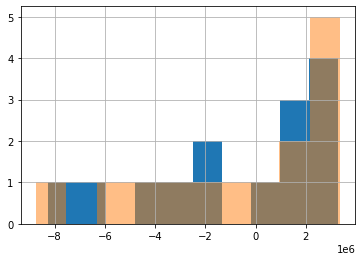

In [201]:
bal_cost_lstm02.hist()
# bal_cost_arima01.hist(alpha=0.5)
# bal_cost_naive02.hist(alpha=0.5)1
bal_cost_es02.hist(alpha=0.5)

In [96]:
df_results.to_excel('final_results_report.xlsx')

**Note**: Balancing cost with minus sign is profit